# Exploratory data analysis and preprocessing

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [6]:
train = train.drop(["PassengerId", "Name"], axis=1)
test = test.drop(["PassengerId", "Name"], axis=1)

In [7]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
test.isna().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [9]:
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

<AxesSubplot:>

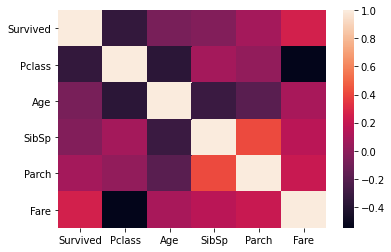

In [10]:
sns.heatmap(train.corr())

In [11]:
train["Age_na"] = np.where(train["Age"].isnull(), 1, 0)
train["Cabin_na"] = np.where(train["Cabin"].isnull(), 1, 0)

<AxesSubplot:>

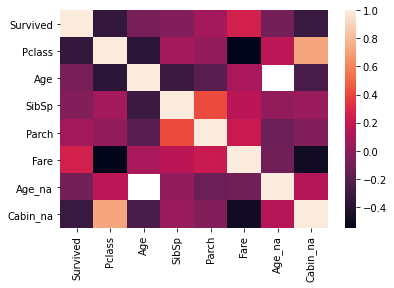

In [12]:
sns.heatmap(train.corr())

In [13]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_na,Cabin_na
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.092197,-0.316912
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.172933,0.725541
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,NaN,-0.249732
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.018958,0.040460
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.124104,-0.036987
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.100707,-0.482075
Age_na,-0.092197,0.172933,NaN,0.018958,-0.124104,-0.100707,1.000000,0.144111
Cabin_na,-0.316912,0.725541,-0.249732,0.040460,-0.036987,-0.482075,0.144111,1.000000


In [14]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na,Cabin_na
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [15]:
train = train.drop(["Cabin_na", "Age_na"], axis=1)

In [16]:
train["Age"] = train["Age"].fillna(train["Age"].mean())
test["Age"] = test["Age"].fillna(test["Age"].mean())

In [17]:
train["Cabin_without_NA"] = np.where(train["Cabin"].isnull(), 0, train["Cabin"])

In [18]:
train["Deck"] = train["Cabin_without_NA"].str.slice(0,1)
train["Room"] = train["Cabin_without_NA"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")

In [19]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_without_NA,Deck,Room
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,NaN,NaN
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,C85,C,85.0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,NaN,NaN
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,C123,C,123.0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,NaN,NaN


In [20]:
train["Deck"] = train["Deck"].fillna("N")
train["Room"] = train["Room"].fillna(train["Room"].median())

In [21]:
train = train.drop(["Cabin","Cabin_without_NA"], axis=1)

In [22]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Room
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,N,43.0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,C,85.0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,N,43.0
3,1,1,female,35.0,1,0,113803,53.1000,S,C,123.0
4,0,3,male,35.0,0,0,373450,8.0500,S,N,43.0


In [23]:
train["Room"] = train["Room"].astype(int)

In [24]:
oh_Deck = pd.DataFrame(pd.get_dummies(train["Deck"]))
oh_Deck.columns = ["Deck==A", "Deck==B", "Deck==C", "Deck==D", "Deck==E", "Deck==F", "Deck==G", "Deck==N", "Deck==T"]
train = pd.concat([train, oh_Deck], axis=1)

In [25]:
oh_Pclass = oh_Deck = pd.DataFrame(pd.get_dummies(train["Pclass"]))
oh_Pclass.columns = ["pclass==1", "pclass==2","pclass==3"]
train = pd.concat([train, oh_Pclass], axis=1)

In [26]:
train = train.drop(["pclass==1"], axis=1)

In [27]:
train= train.drop(["Deck", "Pclass"],axis=1)

In [28]:
train["Sex"] = train["Sex"].map(lambda x: 1 if x=="male" else 0)

In [29]:
train = train.drop(["Ticket"], axis=1)
test = test.drop(["Ticket"], axis=1)

In [30]:
train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Room,Deck==A,Deck==B,Deck==C,Deck==D,Deck==E,Deck==F,Deck==G,Deck==N,Deck==T,pclass==2,pclass==3
0,0,1,22.0,1,0,7.2500,S,43,0,0,0,0,0,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,C,85,0,0,1,0,0,0,0,0,0,0,0
2,1,0,26.0,0,0,7.9250,S,43,0,0,0,0,0,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,S,123,0,0,1,0,0,0,0,0,0,0,0
4,0,1,35.0,0,0,8.0500,S,43,0,0,0,0,0,0,0,1,0,0,1


In [31]:
train["Embarked"] = train["Embarked"].map(train["Embarked"].value_counts()/train.shape[0])

In [32]:
train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Room,Deck==A,Deck==B,Deck==C,Deck==D,Deck==E,Deck==F,Deck==G,Deck==N,Deck==T,pclass==2,pclass==3
0,0,1,22.0,1,0,7.2500,0.725028,43,0,0,0,0,0,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,0.188552,85,0,0,1,0,0,0,0,0,0,0,0
2,1,0,26.0,0,0,7.9250,0.725028,43,0,0,0,0,0,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,0.725028,123,0,0,1,0,0,0,0,0,0,0,0
4,0,1,35.0,0,0,8.0500,0.725028,43,0,0,0,0,0,0,0,1,0,0,1


<AxesSubplot:>

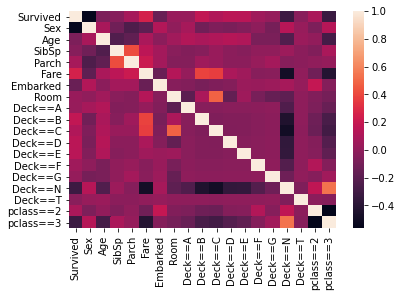

In [33]:
sns.heatmap(train.corr())

In [34]:
train.corr()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Room,Deck==A,Deck==B,Deck==C,Deck==D,Deck==E,Deck==F,Deck==G,Deck==N,Deck==T,pclass==2,pclass==3
Survived,1.000000,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.140971,0.029431,0.022287,0.175095,0.114652,0.150716,0.145321,0.057935,0.016040,-0.316912,-0.026456,0.093349,-0.322308
Sex,-0.543351,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.120296,0.000540,0.078271,-0.109689,-0.058649,-0.079248,-0.047003,-0.008202,-0.091031,0.140391,0.024728,-0.064746,0.137143
Age,-0.069809,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.016598,0.064014,0.121920,0.091394,0.113149,0.132319,0.117211,-0.077209,-0.077253,-0.233123,0.039469,0.006589,-0.281004
SibSp,-0.035322,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.067509,-0.023666,-0.046266,-0.034538,0.029251,-0.017575,-0.036865,0.001706,-0.001402,0.040460,-0.015907,-0.055932,0.092548
Parch,0.081629,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.066246,-0.042050,-0.040325,0.056498,0.030736,-0.019125,-0.016554,0.023694,0.072388,-0.036987,-0.015878,-0.000734,0.015790
Fare,0.257307,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.139112,0.126297,0.019549,0.386297,0.364318,0.098878,0.053717,-0.033093,-0.025180,-0.482075,0.002224,-0.118557,-0.413333
Embarked,-0.140971,0.120296,-0.016598,0.067509,0.066246,-0.139112,1.000000,-0.034797,-0.048228,-0.087677,-0.058727,-0.042283,0.039771,0.031460,0.041159,0.080398,0.020545,0.192723,-0.040897
Room,0.029431,0.000540,0.064014,-0.023666,-0.042050,0.126297,-0.034797,1.000000,-0.188256,0.100903,0.482679,-0.166754,0.051820,-0.083529,-0.152648,-0.181309,-0.003312,-0.052032,-0.099385
Deck==A,0.022287,0.078271,0.121920,-0.046266,-0.040325,0.019549,-0.048228,-0.188256,1.000000,-0.030880,-0.034846,-0.025663,-0.025256,-0.015923,-0.008787,-0.240136,-0.004386,-0.066756,-0.144979
Deck==B,0.175095,-0.109689,0.091394,-0.034538,0.056498,0.386297,-0.087677,0.100903,-0.030880,1.000000,-0.062841,-0.046280,-0.045547,-0.028715,-0.015847,-0.433053,-0.007910,-0.120386,-0.261450


Now we do the same thing with test dataset

In [35]:
test["Cabin_without_NA"] = np.where(test["Cabin"].isnull(), 0, test["Cabin"])

In [36]:
test["Deck"] = test["Cabin_without_NA"].str.slice(0,1)
test["Room"] = test["Cabin_without_NA"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")

In [37]:
test["Deck"] = test["Deck"].fillna("N")
test["Room"] = test["Room"].fillna(test["Room"].median())

In [38]:
test = test.drop(["Cabin","Cabin_without_NA"], axis=1)
test["Room"] = test["Room"].astype(int)

There's no value T in test set apparently so excluding Deck==T in columns

In [39]:
oh_Deck_test = pd.DataFrame(pd.get_dummies(test["Deck"]))
oh_Deck_test.columns = ["Deck==A", "Deck==B", "Deck==C", "Deck==D", "Deck==E", "Deck==F", "Deck==G", "Deck==N"]
test= pd.concat([test, oh_Deck_test], axis=1)

In [40]:
oh_Pclass_test = oh_Deck = pd.DataFrame(pd.get_dummies(test["Pclass"]))
oh_Pclass_test.columns = ["pclass==1", "pclass==2","pclass==3"]
test = pd.concat([test, oh_Pclass_test], axis=1)
test = test.drop(["pclass==1"], axis=1)

In [41]:
test= test.drop(["Deck", "Pclass"],axis=1)

In [42]:
test["Sex"] = test["Sex"].map(lambda x: 1 if x=="male" else 0)

In [43]:
test["Embarked"] = test["Embarked"].map(test["Embarked"].value_counts()/train.shape[0])

In [44]:
test.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,Room,Deck==A,Deck==B,Deck==C,Deck==D,Deck==E,Deck==F,Deck==G,Deck==N,pclass==2,pclass==3
0,1,34.5,0,0,7.8292,0.051627,43,0,0,0,0,0,0,0,1,0,1
1,0,47.0,1,0,7.0000,0.303030,43,0,0,0,0,0,0,0,1,0,1
2,1,62.0,0,0,9.6875,0.051627,43,0,0,0,0,0,0,0,1,1,0
3,1,27.0,0,0,8.6625,0.303030,43,0,0,0,0,0,0,0,1,0,1
4,0,22.0,1,1,12.2875,0.303030,43,0,0,0,0,0,0,0,1,0,1


Since there is no Deck==T column in test, there shouldn't be one in train

In [45]:
train = train.drop(["Deck==T"], axis=1)

# Training

In [46]:
x = train.drop(["Survived"], axis=1)
y = train["Survived"]

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [48]:
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size=0.3, random_state=3)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_valid_scaled = sc.transform(x_valid)

## XGBoost

In [50]:
xgb =XGBClassifier(

    
 n_estimators= 1500,
 max_depth= 3,
 min_child_weight= 3,
 
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.7,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train_scaled, y_train)

In [51]:
accuracy_score(xgb.predict(x_valid_scaled), y_valid)

0.8097014925373134

## LightGBM

In [52]:
lgb = LGBMClassifier(learning_rate=0.5,boosting_type='dart',objective='binary',metric="auc" ,max_depth=3, bagging_fraction=0.4, eval_set=(x_valid, y_valid), early_stopping_rounds=10).fit(x_train, y_train, eval_set=(x_valid, y_valid))

 will be ignored. Current value: 0.725028=
[LightGBM] [Warning] 43 is set=, 43= will be ignored. Current value: 43=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 43 is set=, 43= will be ignored. Current value: 43=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warning] ... is set=, ...= will be ignored. Current value: ...=
[LightGBM] [Warni

In [53]:
accuracy_score(lgb.predict(x_valid), y_valid)

0.8097014925373134

## SVM

In [54]:
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
accuracy_score(svc.predict(x_valid), y_valid)

0.7835820895522388

## Logistic Regression

In [55]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
accuracy_score(lr.predict(x_valid), y_valid)


0.7798507462686567

## Decision Tree

In [56]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)
accuracy_score(dt.predict(x_valid), y_valid)

0.7798507462686567

## Random Forest

In [57]:
rf = RandomForestClassifier(n_estimators=1200, n_jobs=-1, max_depth=10,random_state=128)
rf.fit(x_train,y_train)
accuracy_score(rf.predict(x_valid), y_valid)

0.7947761194029851

## Catboost

In [58]:
cb = CatBoostClassifier(learning_rate=0.04, iterations=1500,random_seed=2,depth=6,eval_metric="AUC")
cb.fit(x_train, y_train)

.29s	remaining: 762ms
943:	total: 1.29s	remaining: 761ms
944:	total: 1.29s	remaining: 759ms
945:	total: 1.29s	remaining: 758ms
946:	total: 1.29s	remaining: 757ms
947:	total: 1.3s	remaining: 755ms
948:	total: 1.3s	remaining: 754ms
949:	total: 1.3s	remaining: 752ms
950:	total: 1.3s	remaining: 751ms
951:	total: 1.3s	remaining: 749ms
952:	total: 1.3s	remaining: 748ms
953:	total: 1.3s	remaining: 746ms
954:	total: 1.3s	remaining: 745ms
955:	total: 1.31s	remaining: 743ms
956:	total: 1.31s	remaining: 742ms
957:	total: 1.31s	remaining: 740ms
958:	total: 1.31s	remaining: 739ms
959:	total: 1.31s	remaining: 738ms
960:	total: 1.31s	remaining: 736ms
961:	total: 1.31s	remaining: 735ms
962:	total: 1.31s	remaining: 733ms
963:	total: 1.32s	remaining: 732ms
964:	total: 1.32s	remaining: 731ms
965:	total: 1.32s	remaining: 729ms
966:	total: 1.32s	remaining: 728ms
967:	total: 1.32s	remaining: 726ms
968:	total: 1.32s	remaining: 725ms
969:	total: 1.32s	remaining: 723ms
970:	total: 1.32s	remaining: 722ms
971:	t

In [59]:
accuracy_score(cb.predict(x_valid), y_valid)

0.8134328358208955